In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from matplotlib.ticker import NullFormatter
import os


# read csv
csv = "Billionaire_Data.csv"
data_df = pd.read_csv(csv)

In [2]:
data_df["gdp_country"] = data_df["gdp_country"].str.replace("$", "")
data_df["gdp_country"] = data_df["gdp_country"].str.replace(",", "")
data_df["gdp_country"]=data_df["gdp_country"].astype(float)

In [3]:
data_df["finalWorth"]/=1000
data_df['gdp_country']/=1000000000
data_df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211.0,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,2715.518274,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180.0,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114.0,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107.0,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106.0,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [4]:
#Compare the net worth of billionaires who are selfmade vs those with inherited wealth
data_df["selfMade"] = data_df["selfMade"].map({True:"Selfmade", False:"Inherited"})

#Number of selfmade billionaires
num_selfmade = data_df.selfMade.value_counts().loc["Selfmade"]
num_selfmade

1812

In [5]:
#number of billionaires with inherited wealth
num_inherited = data_df.selfMade.value_counts().loc["Inherited"]
num_inherited

828

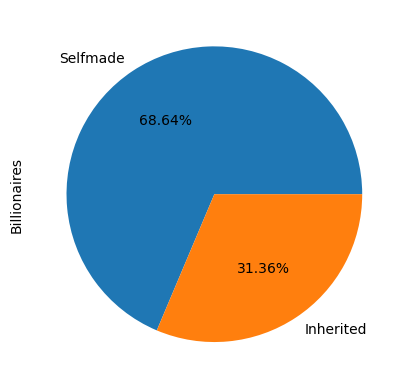

In [6]:
#chart comparing selfmade to inherited
data_df.selfMade.value_counts().plot.pie(autopct='%.2f%%', ylabel='Billionaires');

plt.savefig("Output/selfmade_vs_inherited_1.png")

In [7]:
columns = ["selfMade",
           "finalWorth"]
cut_df = pd.DataFrame(data_df, columns=columns)
# cut_df.dtypes
worth_group = cut_df.groupby(["selfMade"],as_index=False).sum()
worth_group

,selfMade,finalWorth
0,Inherited,4115.5
1,Selfmade,8091.3


In [8]:
tot_in_worth = worth_group.loc[worth_group["selfMade"]== "Inherited", "finalWorth"].iloc[0]

tot_sm_worth = worth_group.loc[worth_group["selfMade"]== "Selfmade", "finalWorth"].iloc[0]


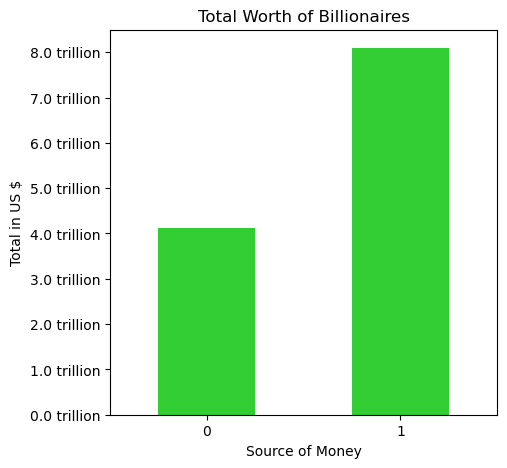

In [9]:
def formatter(x, pos):
    return str(round(x / 1000, 1)) + " trillion"

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_formatter(NullFormatter())

worth_group["finalWorth"].plot.bar(ylabel='Total in US $', rot=0, xlabel="Source of Money",title= "Total Worth of Billionaires", color="limegreen", figsize=(5,5));

plt.savefig("Output/selfmade_vs_inherited_2.png")

In [10]:
columns = ["selfMade",
           "finalWorth"]
cut_df = pd.DataFrame(data_df, columns=columns)
# cut_df.dtypes
mean_group = cut_df.groupby(["selfMade"],as_index=False).mean()
mean_group

,selfMade,finalWorth
0,Inherited,4.970411
1,Selfmade,4.465397


In [11]:
in_mean = mean_group.loc[mean_group["selfMade"]== "Inherited", "finalWorth"].iloc[0]
in_mean = in_mean.round(2)

sm_mean = mean_group.loc[mean_group["selfMade"]== "Selfmade", "finalWorth"].iloc[0]
sm_mean = sm_mean.round(2)

In [12]:
columns = ["selfMade",
           "finalWorth"]
cut_df = pd.DataFrame(data_df, columns=columns)

med_group = cut_df.groupby(["selfMade"]).median()

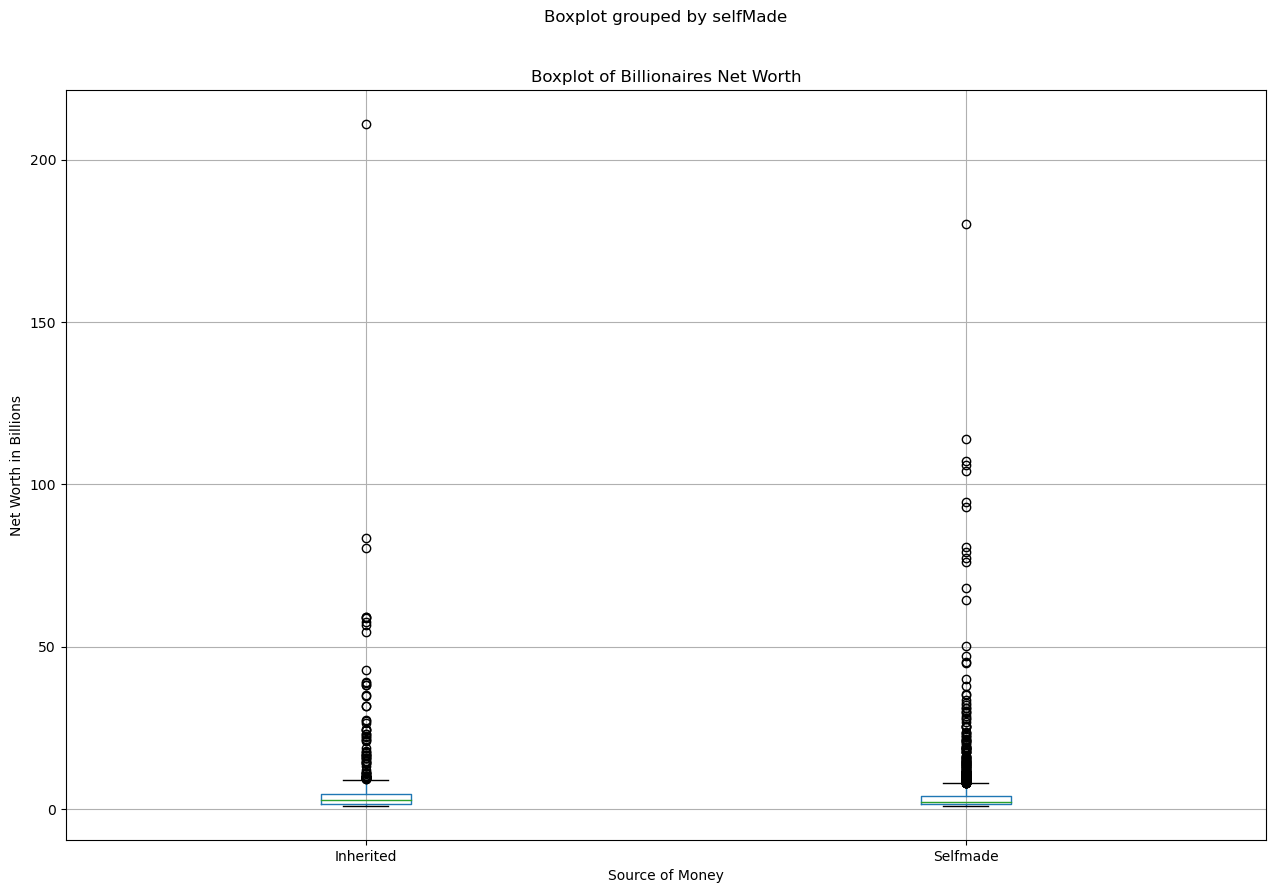

In [13]:
#Boxplot of Inherited wealth vs Selfmade billionaires by Net Worth

data_df.boxplot(by='selfMade', column='finalWorth', grid=True, figsize=(15,10))
plt.title("Boxplot of Billionaires Net Worth")
plt.xlabel('Source of Money')
plt.ylabel('Net Worth in Billions');

plt.savefig("Output/selfmade_vs_inherited_3.png")

In [14]:
worth_inherited = data_df[data_df.selfMade == 'Inherited']
worth_selfmade = data_df[data_df.selfMade == 'Selfmade']

In [15]:
#Selfmade quartiles and bounds

sm_quartiles = worth_selfmade["finalWorth"].quantile([.25,.5,.75])
sm_lowerq = sm_quartiles[0.25]
sm_upperq = sm_quartiles[0.75]
sm_iqr = sm_upperq-sm_lowerq
sm_iqr = sm_iqr.round(2)
sm_lower_bound = sm_lowerq - (1.5*sm_iqr)
sm_upper_bound = sm_upperq + (1.5*sm_iqr)
sm_upper_bound = sm_upper_bound.round(2)

In [16]:
sm_column = worth_selfmade["finalWorth"]
sm_outliers = sm_column[sm_column > 7.9 ].count()

In [17]:
#Inherited quartiles and bounds

in_quartiles = worth_inherited["finalWorth"].quantile([.25,.5,.75])
in_lowerq = in_quartiles[0.25]
in_upperq = in_quartiles[0.75]
in_iqr = in_upperq-in_lowerq

in_lower_bound = in_lowerq - (1.5*in_iqr)
in_upper_bound = in_upperq + (1.5*in_iqr)

In [18]:
in_column = worth_inherited["finalWorth"]
in_outliers = in_column[in_column > 9.1 ].count()

In [20]:
my_report = open(os.path.join("Output","Inherited_vs_Selfmade.txt"), "w")

output = f'''
Analysis of Billionaires Who are Selfmade vs Inherited Wealth
----------------------------
The number of selfmade billionaires is {num_selfmade}
The combined sum of those who are selfmade billionaires is ${tot_sm_worth} trillion

The number of billionaires  with inherited wealth  is {num_inherited}
The combined sum of billionaires with inherited wealth is ${tot_in_worth} trillion

----------------------------

The lower quartile of selfmade worth is: ${sm_lowerq} billion
The upper quartile of selfmade worth is: ${sm_upperq} billion
The interquartile range of selfmade worth is: ${sm_iqr} billion

The the median of selfmade worth is: ${sm_quartiles[0.5]} billion
The average of selfmade worth is ${sm_mean} billion

Values above ${sm_upper_bound} billion could be outliers

There are {sm_outliers} outliers who are selfmade billionaires

----------------------------

The lower quartile of inherited worth is: ${in_lowerq} billion
The upper quartile of inherited worth is: ${in_upperq} billion
The interquartile range of inherited worth is: ${in_iqr} billion

The the median of inherited worth is: ${in_quartiles[0.5]} billion
The average of inherited worth is ${in_mean} billion

Values above ${in_upper_bound} billion could be outliers

There are {in_outliers} outliers with inherited wealth
'''
print(output)
my_report.write(output)


Analysis of Billionaires Who are Selfmade vs Inherited Wealth
----------------------------
The number of selfmade billionaires is 1812
The combined sum of those who are selfmade billionaires is $8091.3 trillion

The number of billionaires  with inherited wealth  is 828
The combined sum of billionaires with inherited wealth is $4115.5 trillion

----------------------------

The lower quartile of selfmade worth is: $1.5 billion
The upper quartile of selfmade worth is: $4.1 billion
The interquartile range of selfmade worth is: $2.6 billion

The the median of selfmade worth is: $2.2 billion
The average of selfmade worth is $4.47 billion

Values above $8.0 billion could be outliers

There are 174 outliers who are selfmade billionaires

----------------------------

The lower quartile of inherited worth is: $1.6 billion
The upper quartile of inherited worth is: $4.625 billion
The interquartile range of inherited worth is: $3.025 billion

The the median of inherited worth is: $2.6 billion
Th

1139